In [859]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [860]:
# Import the dataset for mobility
mobility = pd.read_csv("../data/usitc/border_crossing_entry_data_trade.csv")

In [861]:
# Include only mobility on the US-MX border
borderMX = mobility[(mobility['Border']=="US-Mexico Border")]

In [862]:
borderMX.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,imports,exports
3,Brownsville,TX,2301,US-Mexico Border,12/1/2019 0:00,Bus Passengers,4668,3.580000e+11,1.960000e+11
6,Calexico East,CA,2507,US-Mexico Border,12/1/2019 0:00,Bus Passengers,4080,3.580000e+11,1.960000e+11
8,Columbus,NM,2406,US-Mexico Border,12/1/2019 0:00,Bus Passengers,1452,3.580000e+11,1.960000e+11
11,Douglas,AZ,2601,US-Mexico Border,12/1/2019 0:00,Bus Passengers,107,3.580000e+11,1.960000e+11
13,Eagle Pass,TX,2303,US-Mexico Border,12/1/2019 0:00,Bus Passengers,8525,3.580000e+11,1.960000e+11


In [863]:
borderMX["Measure"].unique()

array(['Bus Passengers', 'Buses', 'Pedestrians',
       'Personal Vehicle Passengers', 'Personal Vehicles',
       'Rail Containers Empty', 'Rail Containers Full',
       'Train Passengers', 'Trains', 'Truck Containers Empty',
       'Truck Containers Full', 'Trucks'], dtype=object)

In [864]:
borderMX["Measure"].value_counts()

Pedestrians                    7277
Personal Vehicles              7222
Personal Vehicle Passengers    7222
Trucks                         7023
Truck Containers Full          7019
Truck Containers Empty         7004
Bus Passengers                 6876
Buses                          6876
Rail Containers Empty          6481
Trains                         6481
Rail Containers Full           6445
Train Passengers               6362
Name: Measure, dtype: int64

In [865]:
# Extract year and consolidate year
import datetime
borderMX['year']= pd.DatetimeIndex(borderMX['Date']).year

C:\Users\nhinojos\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [866]:
## Encoding the categorial variable

In [867]:
var = borderMX[["Measure","Port Code"]].copy()

In [868]:
X1 = var.iloc[:,[0,1]].values
print(X1[-10:])

[['Rail Containers Full' 2309]
 ['Rail Containers Empty' 2608]
 ['Trucks' 2406]
 ['Trains' 2502]
 ['Rail Containers Empty' 2305]
 ['Trains' 2601]
 ['Rail Containers Full' 2504]
 ['Personal Vehicles' 2408]
 ['Pedestrians' 2403]
 ['Trucks' 2505]]


In [869]:
# Encoding categorical data
# Encoding the independent variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [870]:
labelencoder = LabelEncoder()
X1[:, 0] = labelencoder.fit_transform(X1[:, 0])
onehotencoder = OneHotEncoder(categorical_features = [0])
X1 = onehotencoder.fit_transform(X1).toarray()

C:\Users\nhinojos\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\nhinojos\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [871]:
print(X1)

[[1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.301e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.507e+03]
 [1.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.406e+03]
 ...
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 2.408e+03]
 [0.000e+00 0.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 2.403e+03]
 [0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 1.000e+00 2.505e+03]]


In [872]:
X1[-10:]

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.309e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.608e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.406e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.502e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.305e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.60

In [873]:
passen = X1[:,2]
trucks = X1[:,11]

In [874]:
print(passen)

[0. 0. 0. ... 0. 1. 0.]


In [875]:
print(trucks)

[0. 0. 0. ... 0. 0. 1.]


## Now preparing for Naive Bayes

In [876]:
df = borderMX[["year","State","Port Code","Value"]].copy()

In [877]:
X2 = df.iloc[:,[0,2,3]].values
print(X2)

[[2019 2301 4668]
 [2019 2507 4080]
 [2019 2406 1452]
 ...
 [1996 2408 4719]
 [1996 2403  645]
 [1996 2505 3228]]


In [878]:
# PEDESTRIANS FIRST
print(X2.shape)

(82288, 3)


In [879]:
# Create exports matrix for trade data
ex = borderMX.iloc[:,[8]].values

In [880]:
X2 = np.append(arr=X2, values= ex.astype(float),axis=1)

In [881]:
# Create imports matrix for trade data
im = borderMX.iloc[:,[7]].values

In [882]:
X2 = np.append(arr=X2, values= im.astype(float),axis=1)

In [883]:
X2[:10]

array([[2.0190e+03, 2.3010e+03, 4.6680e+03, 1.9600e+11, 3.5800e+11],
       [2.0190e+03, 2.5070e+03, 4.0800e+03, 1.9600e+11, 3.5800e+11],
       [2.0190e+03, 2.4060e+03, 1.4520e+03, 1.9600e+11, 3.5800e+11],
       [2.0190e+03, 2.6010e+03, 1.0700e+02, 1.9600e+11, 3.5800e+11],
       [2.0190e+03, 2.3030e+03, 8.5250e+03, 1.9600e+11, 3.5800e+11],
       [2.0190e+03, 2.4020e+03, 3.9745e+04, 1.9600e+11, 3.5800e+11],
       [2.0190e+03, 2.3050e+03, 2.6540e+04, 1.9600e+11, 3.5800e+11],
       [2.0190e+03, 2.3040e+03, 8.1239e+04, 1.9600e+11, 3.5800e+11],
       [2.0190e+03, 2.6020e+03, 4.9100e+02, 1.9600e+11, 3.5800e+11],
       [2.0190e+03, 2.6040e+03, 1.7302e+04, 1.9600e+11, 3.5800e+11]])

## Establishing Variables 

In [884]:
# Re-establishing the X matrix:
X = X2[:,[4,1]]
print(X)

[[3.58000000e+11 2.30100000e+03]
 [3.58000000e+11 2.50700000e+03]
 [3.58000000e+11 2.40600000e+03]
 ...
 [7.29631894e+10 2.40800000e+03]
 [7.29631894e+10 2.40300000e+03]
 [7.29631894e+10 2.50500000e+03]]


In [885]:
y = passen

In [886]:
print(passen)

[0. 0. 0. ... 0. 1. 0.]


## Naive Bayes Here

In [887]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [888]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [889]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [890]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [891]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15036     0]
 [ 1422     0]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


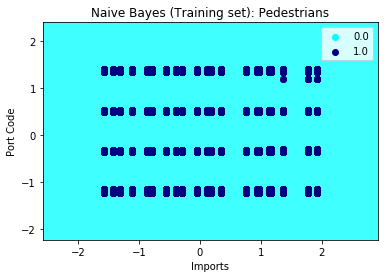

In [892]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('aqua', 'navy'))(i), label = j)
plt.title('Naive Bayes (Training set): Pedestrians')
plt.xlabel('Imports')
plt.ylabel('Port Code')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


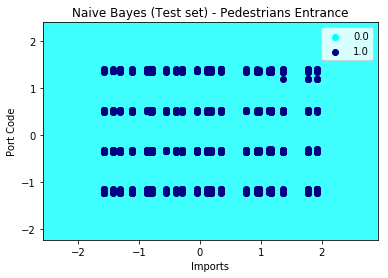

In [893]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('aqua', 'navy'))(i), label = j)
plt.title('Naive Bayes (Test set) - Pedestrians Entrance')
plt.xlabel('Imports')
plt.ylabel('Port Code')
plt.legend()
plt.show()

## Logistic Regression for Pedestrians

In [894]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\nhinojos\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [895]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [896]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15036     0]
 [ 1422     0]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


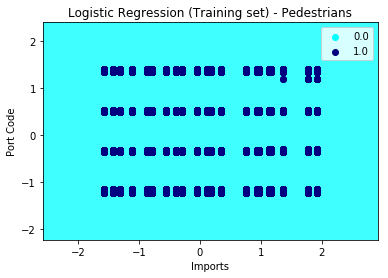

In [897]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('aqua', 'navy'))(i), label = j)
plt.title('Logistic Regression (Training set) - Pedestrians')
plt.xlabel('Imports')
plt.ylabel('Port Code')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


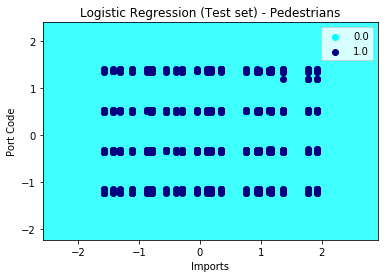

In [898]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('aqua', 'navy'))(i), label = j)
plt.title('Logistic Regression (Test set) - Pedestrians')
plt.xlabel('Imports')
plt.ylabel('Port Code')
plt.legend()
plt.show()

## Starting Naive Bayes for Trucks

In [899]:
y = trucks

In [900]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [901]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [902]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [903]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [904]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15040     0]
 [ 1418     0]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


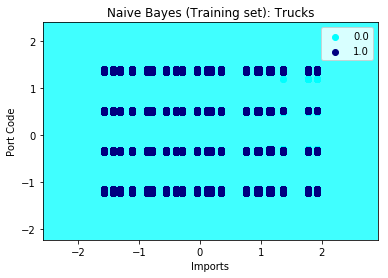

In [905]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('aqua', 'navy'))(i), label = j)
plt.title('Naive Bayes (Training set): Trucks')
plt.xlabel('Imports')
plt.ylabel('Port Code')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


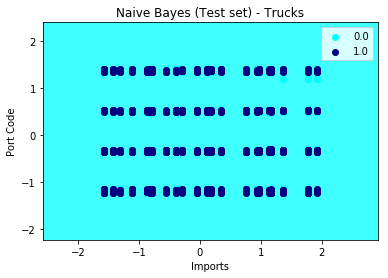

In [906]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                      np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('aqua', 'navy')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('aqua', 'navy'))(i), label = j)
plt.title('Naive Bayes (Test set) - Trucks')
plt.xlabel('Imports')
plt.ylabel('Port Code')
plt.legend()
plt.show()